# Marketing a Product
This project will be through the point-of-view as an employee at an e-learning company. In an attempt to better learn how to advertise the product we make, we will look at the two best markets to invest in for marketing. 

The data we will be accessing is from the [freeCodeCamp's](https://www.freecodecamp.org) 2017 New Coder Survey. The company is a free e-learning platform that offers courses on web development.

This survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [103]:
import pandas as pd
pd.set_option('display.max_columns', 150)

### Loading and Exploring Data

In [104]:
survey_data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',
                          low_memory = 0) #Low_memory erases warning messages

In [105]:
survey_data.shape

(18175, 136)

18,175 rows and 136 columns of data in this file.

In [106]:
survey_data.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

Seems like many rows will be accessory and not important to our goal in this project as they have many Null values. 

In [107]:
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


So in summary this dataset appears to be many survey questions with answers encoded in 1 or null (1 meaning yes and null meaning no response or no). 

### Focus

Most of the courses available on freeCodeCamp are pertinent to web and mobile development, but they also teach subjects such as data science and game development. In this project, we want to answer questions about a population of new coders.

Three questions pivotal to learning more information about this study are:
- Where are these new coders located?
- What are the locations with the greatest number of new coders?
- How much money new coders are willing to spend on learning?

In order to find the answers to these questions, we first must clean the data so the sample we pool is representative of our poulation of interest. 

A first insight into this focus can be accessed through the JobRoleInterest column, where each participant indicates the role(s) they would be interested in.

In [108]:
survey_data['JobRoleInterest'].value_counts(normalize = True)*100
#Normalize gives fractions of total, *100 puts into percentages

Full-Stack Web Developer                                                                                                                                                                                            11.770595
  Front-End Web Developer                                                                                                                                                                                            6.435927
  Data Scientist                                                                                                                                                                                                     2.173913
Back-End Web Developer                                                                                                                                                                                               2.030892
  Mobile Developer                                                                                              

This is a bit convoluted, but from a first glance we see that:
- A large percentage of people wish to be a full-stack web developer
- There are also interests in data science, mobile development and game development. 

Many of the responses also have several positions listed, to try and clean this up let's try to split the responses and take the first position. 

In [109]:
no_nulls = survey_data['JobRoleInterest'].dropna()
split_nulls = no_nulls.str.split(',')
split_nulls

1                               [Full-Stack Web Developer]
2        [  Front-End Web Developer,  Back-End Web Deve...
3        [  Front-End Web Developer,  Full-Stack Web De...
4        [Full-Stack Web Developer,  Information Securi...
6                               [Full-Stack Web Developer]
9        [Full-Stack Web Developer,    Quality Assuranc...
11       [  DevOps / SysAdmin,    Data Scientist,  Info...
13       [Back-End Web Developer,  Full-Stack Web Devel...
14                              [Full-Stack Web Developer]
15                              [Full-Stack Web Developer]
16                              [Full-Stack Web Developer]
18       [Full-Stack Web Developer,    Front-End Web De...
19       [  Front-End Web Developer,    Mobile Develope...
21                                  [Information Security]
22                              [Full-Stack Web Developer]
23                                [Back-End Web Developer]
28                              [Full-Stack Web Develope

Now we have a list of all the responses, which can be counted and then analyzed.

In [110]:
number_of_options = split_nulls.apply(lambda x: len(x))

In [111]:
number_of_options.value_counts(normalize = True).sort_index()*100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

Less than 1/3 of the people in the survey are determined with one specific goal in mind. Others are all interested in multiple career avenues. 

The focus of the website is on web and mobile development, let's see who all is interested in those subjects. 

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


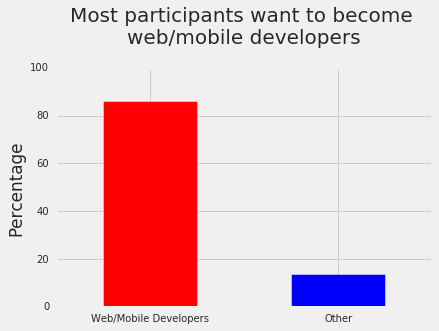

In [112]:
web_mobile = no_nulls.str.contains('Web Developer|Mobile Developer')
freq_table = web_mobile.value_counts(normalize = True) * 100
print(freq_table)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

freq_table.plot.bar(color = ['red','blue'])
plt.xticks([0,1],['Web/Mobile Developers', 'Other'], rotation = 0)
plt.title('Most participants want to become \nweb/mobile developers',
         y = 1.08, fontsize = 20)
plt.ylabel('Percentage')
plt.ylim(0,100)
plt.show()

So in the last few cells of code we created a frequency table that sorted through each response and gave a flag of True if any sequence matched web or mobile developer. Then we graphed that distribution above to see that 4/5 of responses stated their wish to become web, or mobile, developers. 

This is good, as the website is mostly available for people with these career interests. This indicates a sample pool representative of our target population. Let's move on.

### Country
The dataset provides information about the location of each participant through the CountryCitizen variable describing the country of origin, and CountryLive describing where the participant lives in currently. 

For this analysis, we'll focus on **CountryLive**, as we want to know where coders are coming from currently. Because the data set provides information at a country level, we can think of each country as an individual market. So let's try to find the two best countries to advertise in. 

One good indicator of a great market is the number of potential customers, higher the better. 

In [113]:
good_copy = survey_data[survey_data['JobRoleInterest'].notnull()].copy()

In [114]:
absolute_freq = good_copy['CountryLive'].value_counts()
relative_freq = good_copy['CountryLive'].value_counts(normalize = True)*100

In [115]:
pd.DataFrame(data = {'Absolute Frequencies':absolute_freq,
            'Relative Frequencies':relative_freq})
#Creates a table from the two series we created above

,Absolute Frequencies,Relative Frequencies
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45% of the users are located in the United States, which points to it as a premier market for advertising. The next closest response is India, but it isn't separated too much from the United Kingdom. Maybe looking at how much money is spent across the markets will aid us in deciding the 2nd market for advertising. 

### Spending
Let's see how much money new coders are willing to spend on learning. Advertising in regions where learning is mostly free could just be a waste of time and money. 

The **MoneyForLearning** column describes, in American Dollars, the amount of money spent by participants from the moment they started coding until the moment they completed the survey. freeCodeCamp sells subscriptions at $59 per month, so for us to fully compare the two we should see how much money these students pay per month. 

Also, since we've already seen that the majority of responders are in the top four countries, we can isolate the data to just those countries:
- US
- India
- United Kingdom
- Canada

First let's create a new column to figure out how much they've spent per month. 

In [116]:
good_copy['PerMonthSpending'] = good_copy['MoneyForLearning'] / good_copy['MonthsProgramming']

In [117]:
good_copy['PerMonthSpending'].value_counts().head(30)

0.000000       2904
50.000000       123
25.000000       119
16.666667       118
100.000000      111
33.333333       109
8.333333        105
20.000000        85
10.000000        83
83.333333        80
166.666667       67
12.500000        66
4.166667         65
5.000000         62
200.000000       50
500.000000       48
66.666667        47
41.666667        46
250.000000       44
inf              41
1000.000000      41
3.333333         38
20.833333        37
125.000000       36
6.666667         35
2.500000         33
333.333333       31
150.000000       31
5.555556         31
11.111111        31
Name: PerMonthSpending, dtype: int64

There are some values of infinity in this count, so some students just started learning (0 months), let's replace those with 1. 

In [118]:
good_copy['MonthsProgramming'].replace(0,1,inplace = True)
good_copy['PerMonthSpending'] = good_copy['MoneyForLearning'] / good_copy['MonthsProgramming']
good_copy['PerMonthSpending'].value_counts().head(30)

0.000000       3092
50.000000       128
25.000000       120
16.666667       118
100.000000      118
33.333333       109
8.333333        105
20.000000        88
10.000000        83
83.333333        80
166.666667       67
12.500000        66
4.166667         65
5.000000         62
200.000000       53
500.000000       50
66.666667        47
41.666667        46
250.000000       44
1000.000000      43
3.333333         38
20.833333        37
125.000000       36
6.666667         35
2.500000         33
333.333333       31
5.555556         31
150.000000       31
11.111111        31
30.000000        28
Name: PerMonthSpending, dtype: int64

In [119]:
print(good_copy['PerMonthSpending'].isnull().value_counts())

False    6317
True      675
Name: PerMonthSpending, dtype: int64


There are 675 null values in this column still, let's drop those

In [120]:
good_copy = good_copy[good_copy['PerMonthSpending'].notnull()]
print(good_copy['PerMonthSpending'].isnull().value_counts())

False    6317
Name: PerMonthSpending, dtype: int64


Since we want to analyze the countries represented in this survey, we should remove any null values in this column as well, just to make sure everything is clean.  

In [121]:
good_copy['CountryLive'].isnull().value_counts()

False    6212
True      105
Name: CountryLive, dtype: int64

In [122]:
good_copy = good_copy[good_copy['CountryLive'].notnull()]
print(good_copy['CountryLive'].isnull().value_counts())

False    6212
Name: CountryLive, dtype: int64


In [123]:
good_copy['CountryLive'].value_counts()

United States of America         2933
India                             463
United Kingdom                    279
Canada                            240
Poland                            122
Germany                           114
Brazil                            111
Australia                         102
Ukraine                            79
Russia                             79
Nigeria                            72
Spain                              66
Romania                            65
France                             62
Netherlands (Holland, Europe)      59
Italy                              52
Serbia                             44
Philippines                        43
Ireland                            41
Greece                             40
South Africa                       36
Mexico                             33
Turkey                             31
Hungary                            30
Norway                             30
New Zealand                        30
Argentina   

In [124]:
grouped_country = good_copy.groupby(['CountryLive']).mean()

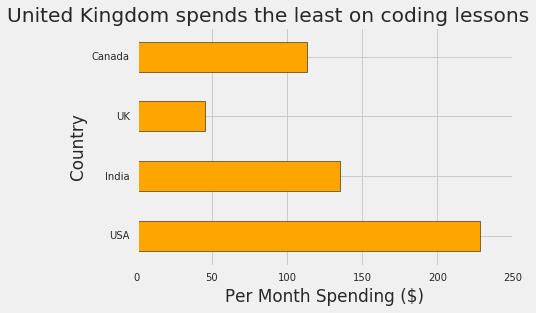

In [125]:
spending_vis = grouped_country['PerMonthSpending'][['United States of America',
                                   'India','United Kingdom',
                                   'Canada']]

spending_vis.plot.barh(color = 'orange', edgecolor = 'black')
plt.ylabel('Country')
plt.xlabel('Per Month Spending ($)')
plt.title('United Kingdom spends the least on coding lessons',
         x = 0.35)
plt.yticks([3,2,1,0],['Canada', 'UK', 'India','USA'])
plt.show()

This is a reasonable result. But we would expect the UK and Canada to have higher values relative to India considering the [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_PPP_per_capita#Lists_of_countries_and_dependencies) is higher in such countries. Let's get some more data to go even further into analysis, it's possible there's outliers

### Boxplots

In [126]:
just_4 = good_copy[good_copy['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]
just_4['CountryLive'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: CountryLive, dtype: int64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



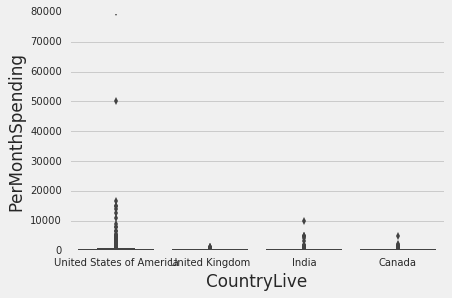

In [127]:
import seaborn as sns
sns.boxplot(y = 'PerMonthSpending', x = 'CountryLive',
            data = just_4)

Actually, there aren't many outliers for India. The US actually has the outliers within the dataset. Although it's entirely possible someone spends that much money, it's pretty unlikely. So we'll remove anything above $20,000.

### Cleaning Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



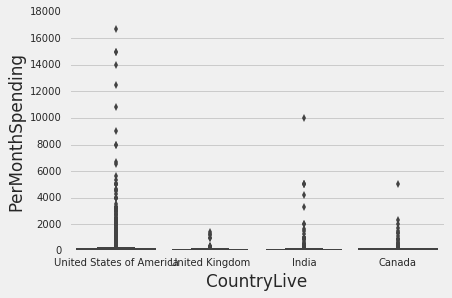

In [128]:
just_4 = just_4[just_4['PerMonthSpending'] < 20000]
sns.boxplot(y = 'PerMonthSpending', x = 'CountryLive',
            data = just_4)

This looks more acceptable, but there are still some values that stray from the general population of participants. First, let's recompute the mean spending now that we've removed that outlier. Then we'll isolate some more of those high spenders. 

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: PerMonthSpending, dtype: float64 



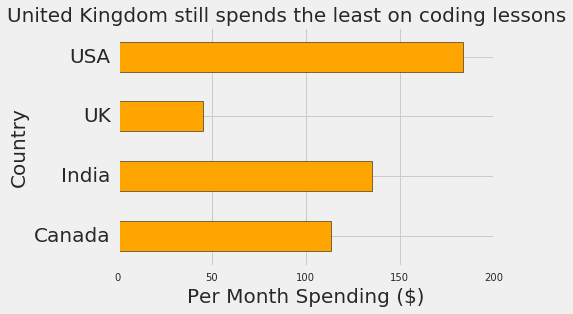

In [129]:
grouped_country = just_4.groupby(['CountryLive']).mean()
print(grouped_country['PerMonthSpending'],'\n')
grouped_country['PerMonthSpending'].plot.barh(color = 'orange', edgecolor = 'black')
plt.ylabel('Country', fontsize = 20)
plt.xlabel('Per Month Spending ($)', fontsize = 20)
plt.title('United Kingdom still spends the least on coding lessons',
         x = 0.45, fontsize = 20)
plt.yticks([0,1,2,3],['Canada', 'India', 'UK','USA'], fontsize = 20)
plt.show()

Now let's look at the outliers from India, Canada and the US. Perhaps their spending was inflated by attending a bootcamp.

In [130]:
india_outlier = just_4[
    (just_4['CountryLive'] == 'India') & 
    (just_4['PerMonthSpending'] >= 2500)]
india_outlier

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,PerMonthSpending
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,N

Well, none of these people attended bootcamps, so the reasoning as to why they spent so much can't really be identified. Regardless, we can remove those rows.

In [131]:
just_4 = just_4.drop(india_outlier.index)

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    183.800110
Name: PerMonthSpending, dtype: float64 



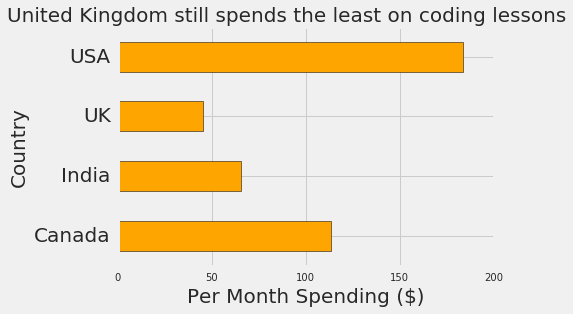

In [132]:
grouped_country = just_4.groupby(['CountryLive']).mean()
print(grouped_country['PerMonthSpending'],'\n')
grouped_country['PerMonthSpending'].plot.barh(color = 'orange', edgecolor = 'black')
plt.ylabel('Country', fontsize = 20)
plt.xlabel('Per Month Spending ($)', fontsize = 20)
plt.title('United Kingdom still spends the least on coding lessons',
         x = 0.45, fontsize = 20)
plt.yticks([0,1,2,3],['Canada', 'India', 'UK','USA'], fontsize = 20)
plt.show()

This produced a large drop off for India. But still, there's stuff to clean up for the US and Canada. 

First off from US, if we look back at our boxplots, it seems the outliers can be separated from the normal population at around the $6000 mark

In [133]:
only_US = just_4[
    (just_4['CountryLive'] == 'United States of America') &
    (just_4['PerMonthSpending'] >= 6000)]
only_US

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,PerMonthSpending
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

So 6 of these people attended bootcamps, while many of them have been coding for less than 3 months! 

In [134]:
pd.DataFrame(data = {'Attended Bootcamp':only_US['AttendedBootcamp'],
            'Month Spending':only_US['PerMonthSpending'],
                    'Months Coding':only_US['MonthsProgramming']})

,Attended Bootcamp,Month Spending,Months Coding
718,1.0,8000.000000,1.0
1222,1.0,6500.000000,2.0
3184,1.0,9000.000000,1.0
3930,0.0,10833.333333,6.0
6805,1.0,15000.000000,1.0
7198,0.0,14000.000000,5.0
7505,1.0,6666.666667,3.0
9778,1.0,8000.000000,1.0
16650,0.0,16666.666667,12.0
16997,0.0,12500.000000,1.0


Even the people that didn't attend a bootcamp have spent more than those that have! This doesn't make much sense, so we can remove firstly the people who spent that much and didn't attend a bootcamp. Then, we can remove the people that have spent $6000, attended a bootcamp, and have been coding for less than 3 months because that's an extravagant amount of money for such little time coding. 

In [136]:
not_bootcamp = just_4[
    (just_4['CountryLive'] == 'United States of America') &
    (just_4['PerMonthSpending'] >= 6000) &
    (just_4['AttendedBootcamp'] == 0)] 
just_4 = just_4.drop(not_bootcamp.index)

novice_coders = just_4[
    (just_4['CountryLive'] == 'United States of America') &
    (just_4['PerMonthSpending'] >= 6000) &
    (just_4['MonthsProgramming'] <= 3)]
just_4 = just_4.drop(novice_coders.index)

CountryLive
Canada                      113.510961
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: PerMonthSpending, dtype: float64 



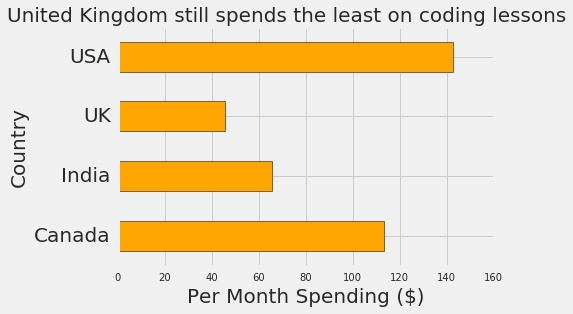

In [137]:
grouped_country = just_4.groupby(['CountryLive']).mean()
print(grouped_country['PerMonthSpending'],'\n')
grouped_country['PerMonthSpending'].plot.barh(color = 'orange', edgecolor = 'black')
plt.ylabel('Country', fontsize = 20)
plt.xlabel('Per Month Spending ($)', fontsize = 20)
plt.title('United Kingdom still spends the least on coding lessons',
         x = 0.45, fontsize = 20)
plt.yticks([0,1,2,3],['Canada', 'India', 'UK','USA'], fontsize = 20)
plt.show()

The US still leads the way in terms of spending. As we move onto Canada, there was only one outlier, one person who spent more than $4,000. 

In [138]:
canadian = just_4[
    (just_4['CountryLive'] == 'Canada') &
    (just_4['PerMonthSpending'] >= 4000)]
canadian

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,PerMonthSpending
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


The person only has 10 hours of learning and less than 2 months programming. Applying our previous limitations from the US to this participant, it makes sense for us to remove him from the sample pool. 

In [139]:
just_4 = just_4.drop(canadian.index)

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: PerMonthSpending, dtype: float64 



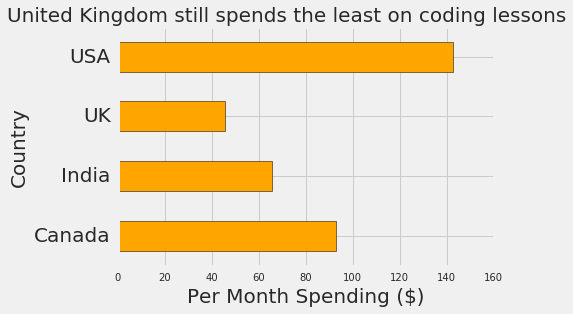

In [140]:
grouped_country = just_4.groupby(['CountryLive']).mean()
print(grouped_country['PerMonthSpending'],'\n')
grouped_country['PerMonthSpending'].plot.barh(color = 'orange', edgecolor = 'black')
plt.ylabel('Country', fontsize = 20)
plt.xlabel('Per Month Spending ($)', fontsize = 20)
plt.title('United Kingdom still spends the least on coding lessons',
         x = 0.45, fontsize = 20)
plt.yticks([0,1,2,3],['Canada', 'India', 'UK','USA'], fontsize = 20)
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



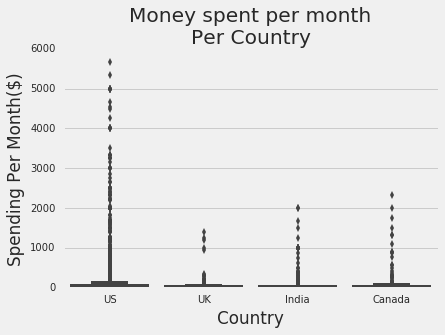

In [151]:
sns.boxplot(y = 'PerMonthSpending', x = 'CountryLive',
            data = just_4)
plt.title('Money spent per month\nPer Country')
plt.ylabel('Spending Per Month($)')
plt.xlabel('Country')
plt.xticks([0,1,2,3],['US','UK','India','Canada'])
plt.show()

### The Best Markets

It's obvious that a market this company should invest in marketeting for is the United States, we now need to choose the 2nd market. It seems like a battle between India and Canada. Let's remember that the customer population is a good indicator...

In [146]:
just_4['CountryLive'].value_counts(normalize = True) *100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

India has a higher market % of the participants in this survey. So it's reasonable to pick that as the 2nd market. But Canada does spend more money... Let's brainstorm some options. 

Picking more than two markets:
- It's clear that the U.S is the highest market draw, so let's set aside 60-70% of advertising. Now splitting between India and Canada, we could do 20/10% of India/Canada, or maybe 60/25/15 between the three countries. 

Picking just one market:
- Would have to be either 70/30 or 65/35% for marketing between two markets. And India or Canada could be substituted. I do believe that India is the better choice because of it's higher population representation in the survey, but for some better advice you could pass this info onto a marketing team or something for further advice. 

# Conclusion
In this project we took in a dataset of survey data, analyzed markets that would be profitable to market in, and came to the conclusion that the United States is the premier country to advertise the company's services in. For a second market, India and Canada both appear to be promising candidates, so ultimately we can rely on the advice of a marketing team to choose which one to pursue further. 